In [1]:
%matplotlib inline
# Python program to generate WordCloud 

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
from PIL import Image

import csv
import re

In [2]:
# Reads Training Data csv file  
df = pd.read_csv("labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [3]:
comment_words = " ".join(review for review in df["review"])
print ("There are {} words in the combination of all reviews.".format(len(comment_words)))

There are 33267763 words in the combination of all reviews.


In [ ]:
# Get the number of reviews based on the dataframe column size
num_reviews = df["review"].size

# Initialize an empty list to hold the clean reviews
print "Cleaning and parsing the training set movie reviews...\n"
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_reviews ):
     # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_reviews )                                                                    
    clean_train_reviews.append( review_to_words( df["review"][i] ))

In [4]:
#get first 100 reviews to test
df_positive = df.loc[df["sentiment"] == 1]
df_positive = df_positive.iloc[0:100]
df_positive.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [5]:
df_negative = df.loc[df["sentiment"] == 0]
df_negative = df_negative.iloc[0:100]

df_negative.head()

,id,sentiment,review
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."


In [6]:
#Words we want to ignore
stopwords = ['a', 'bad', 'good','br', 'film', 'movie', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your', 'story', 'time']
stopwords += ['yours', 'yourself', 'yourselves', 'people', 'film', 'character', 'make', 'really']
stopwords += ['The', "br", 'This', "it's","It's","A","It'","It","like", "film","movie","just", "good", "zombie"]

In [7]:
print(stopwords)

['a', 'bad', 'good', 'br', 'film', 'movie', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found',

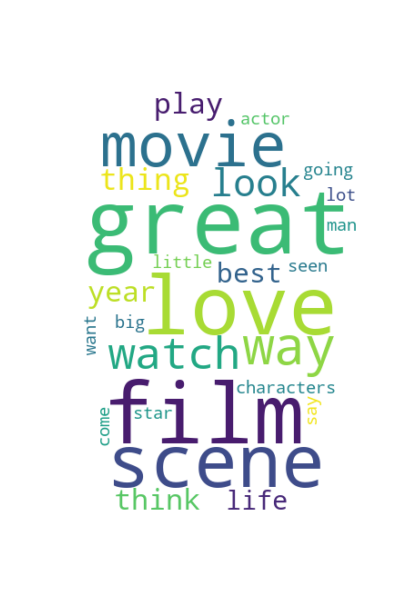

In [9]:
# Join all reviews:
review_words = "".join(review for review in df_positive.review)

# Generate a word cloud image based on bag of popcorn
mask = np.array(Image.open("bag.jpg"))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 18, 
                max_words=200,
                mask=mask).generate(review_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# store to file
plt.savefig("images/positive_wordcloud.png", format="png")

plt.show() 

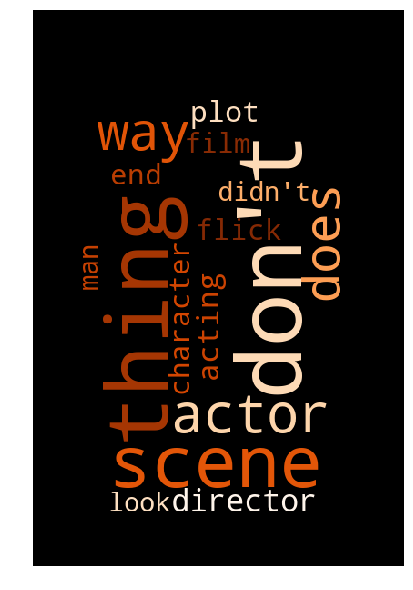

In [10]:
# Join all reviews:
review_words = "".join(review for review in df_negative.review)

# Generate a word cloud image based on bag of popcorn
mask = np.array(Image.open("bag.jpg"))
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 18, 
                max_words=200,
                mask=mask, colormap="Oranges_r").generate(review_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# store to file
plt.savefig("images/negative_wordcloud.png", format="png")

plt.show() 